# Asset Management Project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ffn 
import os
import yfinance as yf
import pandas as pd
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta

sns.set(style='darkgrid')
sns.mpl.rc('figure', figsize=(7, 5))
sns.mpl.rc('font', size = 12)

pd.set_option('display.max_columns', 100)

## Investment Univers

We have to find 5 - 8 titles to use.

To choose the title, we will use a fundamental stock criterion. I will define them here for educational purposes.

1- **Earnings per share (EPS)**:  EPS measures a company's profitability by showing how much profit is allocated to each outstanding share.

\begin{equation}
EPS = \frac{Net Income - PreferredDividends}{Outstanding Shares}
\end{equation}

2- **Price to Earnings (P/E) ratio**: The P/E ratio is a valuation ratio of a company's current share price compared to its per-share earnings.

\begin{equation}
P/E = \frac{Price per Share}{Earnings per Share}
\end{equation}

3- **Price to Book (P/B) ratio**: The P/B ratio is a valuation ratio that compares a company's stock price to its book value.

\begin{equation}
P/B = \frac{Price per Share}{Book Value per Share}
\end{equation}

Book Value is the total value of the company's assets that shareholders would theoretically receive if a company were liquid minus the liabilities.

4- **Enterprise Value to EBITDA (EV/EBITDA) ratio**: is used to measure a company's total valuation relative to its earnings before interest, taxes, depreciation, and amortization.

\begin{equation}
EV/EBITDA = \frac{Enterprise Value}{EBITDA}
\end{equation}

EBITDA shows how much money your business is making before paying for taxes, interest, or depreciation. It helps compare companies without worrying about their loans or tax tricks. EBIDTA = Revenue - Basic Costs

5- **Return on Equity (ROE)**: ROE measures a corporation's profitability by revealing how much profit a company generates with the money shareholders have invested.

\begin{equation}
ROE = \frac{Net Income}{Shareholder's Equity}
\end{equation}

6- **Return on Invested Capital (ROIC)**: ROIC measures how effectively a company uses the money invested in its operations to generate profit.

\begin{equation}
ROIC = \frac{Net Income - dividends}{Total Capital Invested} \times 100
\end{equation}

Total Capital Invested = Total Debt + Shareholder's Equity (Money invested by shareholders)

7- **Dividend Yield**: The dividend yield is the financial ratio that measures the quantum of cash dividends paid out to shareholders relative to the market value per share.

\begin{equation}
Dividend Yield = \frac{Annual Dividends per Share}{Price per Share} \times 100
\end{equation}

8- **Debt to Equity (D/E) ratio**: D/E Ratio measures a company's financial leverage by comparing total debt to shareholders' equity.

\begin{equation}
D/E = \frac{Total Debt}{Shareholder's Equity}
\end{equation}


| Metric | Definition | Ideal Range |
| --- | --- | --- |
| EPS | Profit per outstanding share | Higher is better|
| P/E Ratio | Stock price vs. earning | 	<20 (Varies by sector)|
| P/B Ratio | Stock price vs. book value | <3 (Depends on industry)|
| EV/EBITDA | Enterprise value relative to EBITDA | <10|
| ROE (%) | Profitability from shareholders’ equity | >15%|
| ROIC (%) | Efficiency of capital usage | >10%|
| Dividend Yield | 	Dividend payout relative to stock price | 	>2%|
| D/E Ratio | Financial leverage (Debt vs. Equity) | 	<1.5|


In [3]:
industries = {
    "Technology": ["ASML.AS", "SAP.DE", "IFX.DE", "STM.PA", "NOKIA.HE", "ERIC-B.ST"],
    "Healthcare": ["SAN.PA", "RHHBY.SW", "NVO", "AZN.L", "GSK.L", "NOVN.SW", "BAYN.DE"],
    "Renewable Energy": ["ENR.DE", "ENEL.MI", "ORSTED.CO", "VWS.CO", "EDPR.LS", "EOAN.DE"],
    "Consumer Staples": ["ULVR.L", "BN.PA", "DANO.PA", "ABI.BR", "NESN.SW", "HEIA.AS", "RB.L"],
    "Utilities": ["IBE.MC", "ENGI.PA", "EDF.PA", "RWE.DE", "EOAN.DE", "NG.L"],
    "Financials": ["HSBA.L", "BARC.L", "GLE.PA", "BNP.PA", "DBK.DE", "ISP.MI", "CSGN.SW"],
    "Luxury & Consumer Discretionary": ["MC.PA", "RMS.PA", "OR.PA", "KER.PA", "ADS.DE", "RACE.MI", "KER.PA", "CPRI"],
    "Biotechnology": ["AZN.L", "NVO", "NOVN.SW", "BAYN.DE", "SNY.PA"],
}

tickers = [ticker for tickers in industries.values() for ticker in tickers]

stock_data = []

for industry, tickers in industries.items():
    for ticker in tickers:

        try:
            stock = yf.Ticker(ticker)
            info = stock.info
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
        
        try:
            stock_data.append({
                "Ticker": ticker,
                "Industry": industry,
                "EPS": info.get("trailingEps"),
                "P/E Ratio": info.get("trailingPE"),
                "P/B Ratio": info.get("priceToBook"),
                "EV/EBITDA": info.get("enterpriseToEbitda"),
                "ROE (%)": info.get("returnOnEquity", 0) * 100 if info.get("returnOnEquity") else None,
                "Dividend Yield (%)": info.get("dividendYield", 0) * 100 if info.get("dividendYield") else 0,
                "Debt-to-Equity": info.get("debtToEquity")
            })
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")

# Convert to DataFrame
df = pd.DataFrame(stock_data)
df.head()

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RHHBY.SW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RHHBY.SW&crumb=rvk3O6xuL9g


Error fetching data for RHHBY.SW: 'NoneType' object has no attribute 'update'


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SNY.PA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SNY.PA&crumb=rvk3O6xuL9g


Error fetching data for SNY.PA: 'NoneType' object has no attribute 'update'


,Ticker,Industry,EPS,P/E Ratio,P/B Ratio,EV/EBITDA,ROE (%),Dividend Yield (%),Debt-to-Equity
0,ASML.AS,Technology,19.21,34.133266,13.956706,25.371,47.427,112.0,27.410
1,SAP.DE,Technology,2.64,91.893936,6.228338,31.686,7.062,97.0,22.164
2,IFX.DE,Technology,1.07,32.485977,2.652625,11.051,8.035,101.0,29.279
3,STM.PA,Technology,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,NOKIA.HE,Technology,0.31,15.737097,1.269121,6.923,8.271,266.0,22.895


In [4]:
min_index = df.sort_values(
    by=["Industry", "P/E Ratio"], ascending=[True, True]
    ).groupby(
        "Industry"
    )['P/E Ratio'].idxmin()
    
min_row = df.loc[min_index]  
min_row

,Ticker,Industry,EPS,P/E Ratio,P/B Ratio,EV/EBITDA,ROE (%),Dividend Yield (%),Debt-to-Equity
49,NOVN.SW,Biotechnology,5.17,18.636364,4.320434,10.088,26.275000,363.0,71.162
23,NESN.SW,Consumer Staples,4.19,21.284010,6.387795,15.729,30.580000,342.0,173.221
35,BNP.PA,Financials,9.57,7.912226,0.737279,NaN,9.267000,633.0,NaN
11,NOVN.SW,Healthcare,5.17,18.636364,4.320434,10.088,26.275000,363.0,71.162
39,MC.PA,Luxury & Consumer Discretionary,25.11,24.097967,4.475459,14.785,19.635001,215.0,59.613
18,EOAN.DE,Renewable Energy,1.73,7.511560,1.903193,37.825,25.204000,423.0,161.649
4,NOKIA.HE,Technology,0.31,15.737097,1.269121,6.923,8.271000,266.0,22.895
30,EOAN.DE,Utilities,1.73,7.511560,1.903193,37.825,25.204000,423.0,161.649


We will use the companies with the lowest P/E ratio. This is an arbitrary decision, just to continue with the homework.

In [5]:
portfolio_tickers = min_row['Ticker'].tolist()

data = pd.DataFrame()

for ticker_symbol in portfolio_tickers:
    ticker = yf.Ticker(ticker_symbol)
    ticker_data = ticker.history(period="15y")
    ticker_data.index = ticker_data.index.normalize().tz_localize(None)
    data[ticker_symbol] = ticker_data['Close']

In [6]:
data = data.dropna()
data.head()

,NOVN.SW,NESN.SW,BNP.PA,MC.PA,EOAN.DE,NOKIA.HE
Date,,,,,,
2010-03-15,25.951767,34.566723,25.575094,64.646568,10.858445,6.859622
2010-03-16,25.951767,34.855587,26.166895,65.446365,10.836247,6.973950
2010-03-17,25.906498,34.759300,26.276152,64.888023,10.783781,7.177198
2010-03-18,26.086237,34.727203,26.039431,65.778358,10.694993,7.081925
2010-03-19,26.108646,34.117386,26.094055,65.355820,10.610239,7.094629


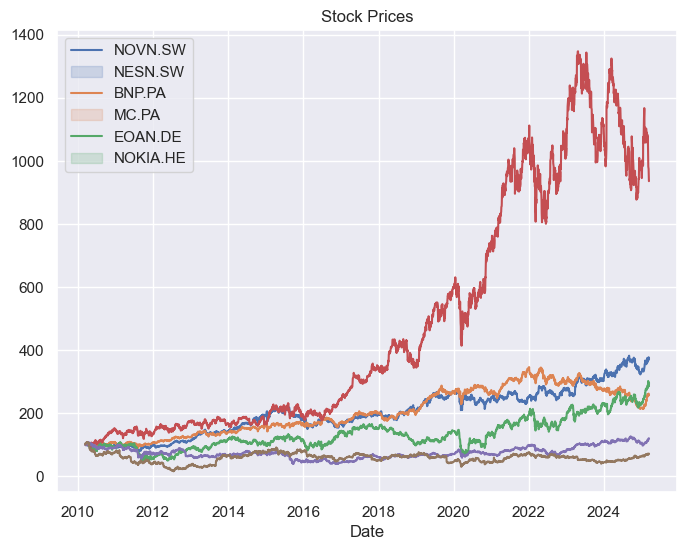

In [7]:
plt.figure(figsize=(8, 6))
plt.title("Stock Prices")
sns.lineplot(data=data.rebase(), dashes=False)
plt.legend(data.columns)
plt.show()

## Dynamic Benchmark

The benchmark for the dynamic portfolio will be the SX5E which the ticker is `^STOXX50E`.

In [8]:
ticker = yf.Ticker('^STOXX50E')
ticker_data = ticker.history(period="15y")
benchmark = ticker_data['Close']
benchmark.index = benchmark.index.normalize().tz_localize(None)
benchmark = benchmark.dropna()
benchmark = benchmark.loc[data.index[0]:data.index[-1]]

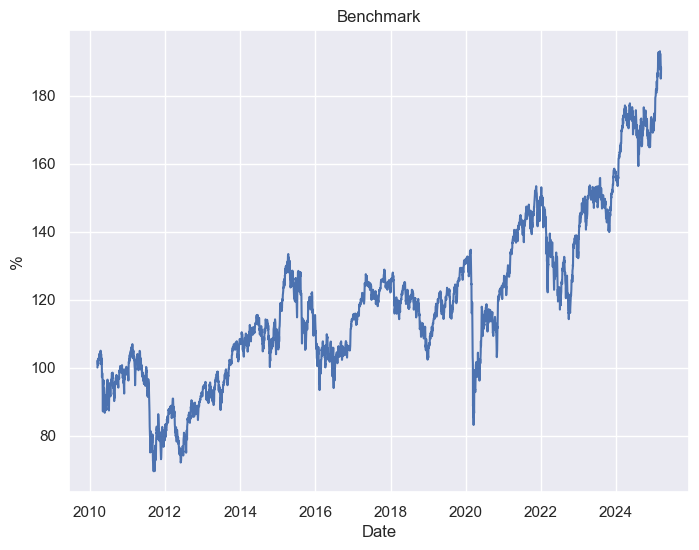

In [9]:
plt.figure(figsize=(8, 6))
plt.title("Benchmark")
sns.lineplot(data=benchmark / benchmark.iloc[0] * 100) 
plt.ylabel("%")
plt.show()

to_returns does $ \frac{P_{t} - P_{t-1}}{P_{t-1}} $

In [10]:
returns_benchmark = benchmark.to_returns().dropna()

In [11]:
def create_monthly_table(return_series, num_of_components):
    return_series.rename('weighted rets',inplace=True)
    return_series = (return_series/ float(num_of_components))
    returns_df_m = pd.DataFrame((return_series + 1).resample('ME').prod() - 1)
    returns_df_m['Month'] = returns_df_m.index.month
    monthly_table = returns_df_m[['weighted rets','Month']].pivot_table(returns_df_m[['weighted rets','Month']], index=returns_df_m.index, columns='Month', aggfunc='sum').resample('YE')
    monthly_table = monthly_table.aggregate('sum')
    monthly_table.columns = monthly_table.columns.droplevel()
    monthly_table.index = monthly_table.index.year
    monthly_table['YTD'] = ((monthly_table + 1).prod(axis=1) - 1)
    monthly_table = monthly_table * 100
    monthly_table.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','YTD']
    return monthly_table.round(2).fillna("")

In [12]:
create_monthly_table(returns_benchmark, 1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
Date,,,,,,,,,,,,,
2010,0.00,0.00,2.11,-3.90,-7.33,-1.42,6.56,-4.35,4.76,3.53,-6.82,5.89,-2.21
2011,5.22,2.01,-3.39,3.45,-6.37,1.03,-6.25,-13.79,-5.32,9.43,-2.30,-0.60,-17.47
2012,4.32,3.95,-1.39,-6.90,-8.13,6.88,2.69,4.94,0.56,2.01,2.86,2.00,13.39
2013,2.90,-2.57,-0.36,3.35,2.13,-6.03,6.36,-1.69,6.31,6.04,0.61,0.46,18.05
2014,-2.80,4.49,0.39,1.16,1.44,-0.50,-3.49,1.83,1.68,-3.49,4.42,-3.54,1.13
2015,6.87,7.39,2.73,-2.21,-1.24,-4.10,5.15,-9.19,-5.17,10.24,2.58,-6.23,4.85
2016,-7.39,-3.26,2.01,0.77,1.16,-6.49,4.40,1.08,-0.69,1.77,-0.12,7.83,0.08
2017,-1.82,2.75,5.46,1.68,-0.14,-3.17,0.22,-0.81,5.07,2.20,-2.83,-1.85,6.49
2018,3.01,-4.72,-2.25,5.21,-3.67,-0.32,3.83,-3.76,0.19,-5.93,-0.76,-5.88,-14.77


Some definition:

1. CARG (compound annual growth rate)
2. Skew: Measure return asymeetry
3. Kurtosis: Hihg values indicate extreme results
4. VaR (Value at Risk): The maximum loss that can be expected with a certain probability
    1. Formula $ VaR = \mu - Z_{\alpha} \cdot \sigma $
        1. $\mu$ is mean return
        2. $Z_{\alpha}$ Z-score for confidence level (1.65 for 90%)
        3. $\sigma$ is standard deviation or volatility
5. CVaR (Conditional Value at Risk): The average loss that can be expected with a certain probability
6. Sharpe Ratio: Measure the return of an investment compared to its risk
    1. Formula $ Sharpe = \frac{R_p - R_f}{\sigma_p} $
7. Volatility: Measure the dispersion of returns
    1. Formula $ Volatility = \sigma = \sqrt{ \frac{\Sigma (r_t - \bar{r})^2}{n - 1} } $ 

In [13]:
stats_benchmark = benchmark.calc_stats()
stats_benchmark.display()

Stats for Close from 2010-03-15 00:00:00 - 2025-03-14 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
88.26%              0.31  4.31%   -38.27%

Annualized Returns:
mtd     3m     6m      ytd     1y     3y      5y      10y    incep.
------  -----  ------  ------  -----  ------  ------  -----  --------
-1.09%  8.78%  11.56%  10.99%  8.23%  13.04%  17.16%  3.84%  4.31%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.31     0.33       0.40
mean    6.29%    5.47%      5.27%
vol     20.25%   16.64%     13.27%
skew    -0.28    -0.12      -0.31
kurt    7.39     0.91       -0.86
best    10.35%   18.06%     25.51%
worst   -12.40%  -16.30%    -17.47%

Drawdowns:
max      avg       # days
-------  ------  --------
-38.27%  -3.65%     71.71

Misc:
---------------  ------
avg. up month    3.86%
avg. down month  -3.80%
up year %        73.33%
12m up %

In [14]:
benchmark.calc_sharpe() 

np.float64(4.913419800027594)

In [15]:
stats_portfolio = data.calc_stats()

df_stats_portfolio = pd.DataFrame({
    asset : stats_portfolio[asset].stats 
    for asset in stats_portfolio.keys()
}).T
df_stats_portfolio.index.name = "Ticker"

stats_portfolio.display()

Stat                 NOVN.SW     NESN.SW     BNP.PA      MC.PA       EOAN.DE     NOKIA.HE
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2010-03-15  2010-03-15  2010-03-15  2010-03-15  2010-03-15  2010-03-15
End                  2025-03-14  2025-03-14  2025-03-14  2025-03-14  2025-03-14  2025-03-14
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         271.27%     157.99%     196.07%     836.01%     19.68%      -28.88%
Daily Sharpe         0.58        0.49        0.38        0.68        0.18        0.13
Daily Sortino        0.95        0.80        0.63        1.17        0.29        0.21
CAGR                 9.14%       6.52%       7.51%       16.08%      1.20%       -2.25%
Max Drawdown         -32.01%     -38.35%     -59.43%     -34.93%     -63.84%     -85.84%
Calmar Ratio         0.29        0.17        0.13        0.46        0.02        -0.03

MTD                 

I will continue with the homework now, but we can choose better stocks givent their sharpe ratios.

#### When to use simple returns vs log returns?

- Simple Returns are like saying: “Today, I gained 5% on my investment.” 
- Log Returns are like saying: “If I keep investing, how does this return accumulate over time?”
- For statistical calculations (like correlation & covariance), log returns are the best choice because they make models more mathematically stable.

In [16]:
log_returns = np.log(data / data.shift(1))
log_returns = log_returns.dropna()

# Average returns daily
log_returns.mean()

NOVN.SW     0.000352
NESN.SW     0.000254
BNP.PA      0.000291
MC.PA       0.000600
EOAN.DE     0.000048
NOKIA.HE   -0.000091
dtype: float64

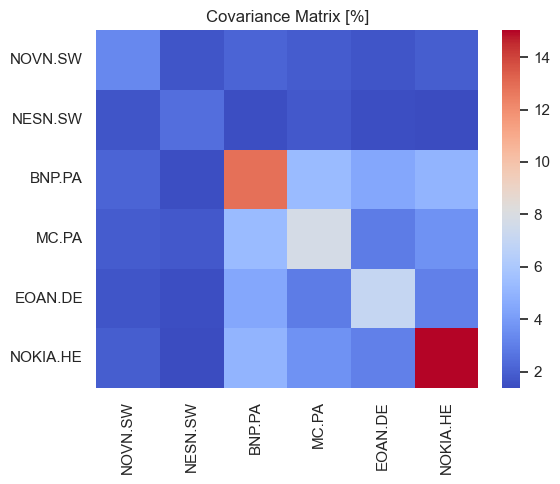

In [17]:
plt.figure(figsize=(6, 5))
plt.title("Covariance Matrix [%]")
sns.heatmap(log_returns.cov() * 252 * 100, annot=False, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [18]:
def portfolio_returns (weights, log_returns=log_returns):
    return np.sum(log_returns.mean() * weights) * 252

def portfolio_volatility (weights, log_returns=log_returns):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

## Portfolio Selection

## Static Portfolio Allocation

### Portfolio Optimization

#### MC simulation for portfolio weights


In [19]:
number_of_assets = len(data.columns)
number_of_assets

6

In [20]:
from collections import namedtuple

Portfolio = namedtuple('Portfolio', ['returns', 'volatility'])

portfolios = [
    Portfolio(
        returns = portfolio_returns( 
                    weights := (w:= np.random.random(number_of_assets)) / np.sum(w)
        ),
        volatility = portfolio_volatility(weights)
    )
    for _ in range(100_000)
]

df_portfolios = pd.DataFrame(portfolios)

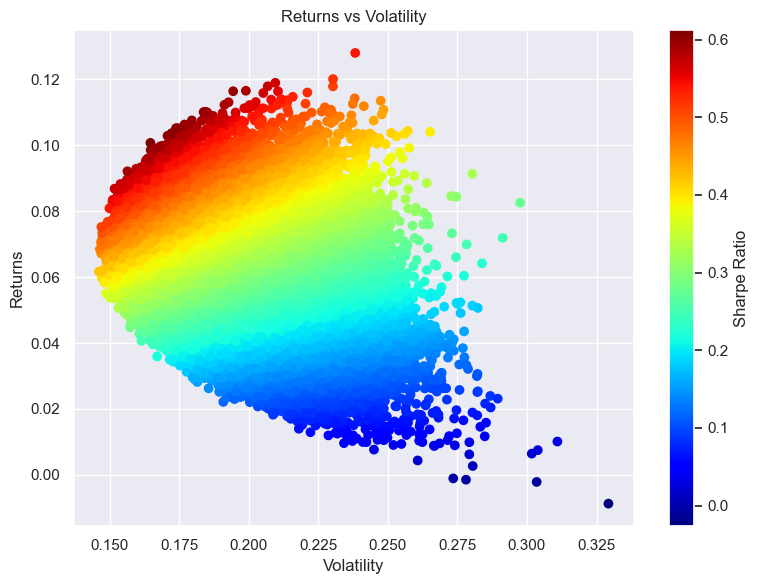

In [21]:
plt.figure(figsize=(8, 6))
plt.title("Returns vs Volatility")
plt.scatter(df_portfolios.volatility, 
            df_portfolios.returns, 
            c=df_portfolios.returns / df_portfolios.volatility,
            marker='o', cmap='jet', 
            alpha=1)
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar(label="Sharpe Ratio")
plt.tight_layout()
plt.show()


#### Optimization scipy

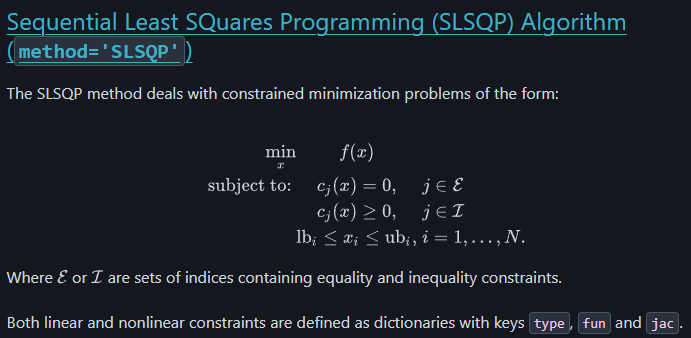

```python
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]]),
             'jac' : lambda x: np.array([[-1.0, -2.0],
                                         [-2*x[0], -1.0],
                                         [-2*x[0], 1.0]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}
```

For the bounds, we can define them as tuples with the desired range. For example, if we want to limit the weights between 0 and 1, we can define the bounds as follows:

```python
bounds = ((0, 1), (0, 1))
```


##### We will optimize this portfolio by **minimizing** the **sharpe ratio**.

In [22]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -portfolio_returns(weights) / portfolio_volatility(weights)

bounds = tuple((0, 1) for asset in range(number_of_assets))

# We want the weights to sum up to 1
eq_constraints = {
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1
} 

initial_guess = number_of_assets * [1. / number_of_assets]

opt_sharpe = sco.minimize(
    min_func_sharpe,
    x0 = initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
print("Optimal Sharpe", -1 * opt_sharpe['fun'])

Optimal Sharpe 0.6266149989123991


In [23]:
x_sharpe = np.array([ value if value > 1e-6 else 0 for value in opt_sharpe.x ])
x_sharpe /= np.sum(x_sharpe)
x_sharpe

array([0.45611003, 0.13233441, 0.        , 0.41155556, 0.        ,
       0.        ])

##### We will optimize this portfolio by **minimizing** the **volatility $\sigma$**.

In [24]:
opt_vol = sco.minimize(
    portfolio_volatility,
    x0 = initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
x_vol = np.array([ value if value > 1e-5 else 0 for value in opt_vol.x ])
x_vol /= np.sum(x_vol)

print("Min vol returns", portfolio_returns(x_vol))
print("Min vol volatility", portfolio_volatility(x_vol))
print("Min vol sharpe", portfolio_returns(x_vol) / portfolio_volatility(x_vol))

Min vol returns 0.06540759670569112
Min vol volatility 0.14513451903163627
Min vol sharpe 0.45066878053617027


##### Efficient Frontier

I will fix the risk and we will get the best return.

In [25]:
def fun_returns (weights):
    return -portfolio_returns(weights)

expected_volatilities = np.linspace(0.13, 0.25, 25)
optimal_returns = []

for expected_vol in expected_volatilities:
    constraints = ({
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }, {
        'type': 'eq',
        'fun': lambda x: portfolio_volatility(x) - expected_vol
    })
    
    initial_guess = number_of_assets * [1. / number_of_assets]
    bounds = tuple((0, 1) for asset in range(number_of_assets))
    
    opt = sco.minimize(
        fun_returns,
        x0 = initial_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    optimal_returns.append(-1 * opt['fun'])

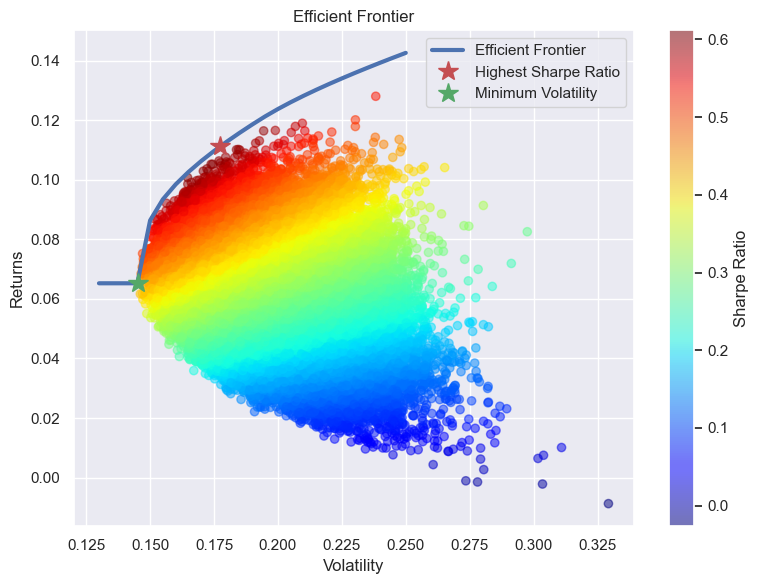

In [26]:
plt.figure(figsize=(8, 6))
plt.title("Efficient Frontier")
plt.scatter(df_portfolios.volatility, 
            df_portfolios.returns, 
            c=df_portfolios.returns / df_portfolios.volatility,
            marker='o', cmap='jet', 
            alpha=0.5)
plt.plot(expected_volatilities, optimal_returns, lw=3, label="Efficient Frontier")
plt.plot(portfolio_volatility(x_sharpe), portfolio_returns(x_sharpe), 
         'r*', markersize=15.0, label="Highest Sharpe Ratio")
plt.plot(portfolio_volatility(x_vol), portfolio_returns(x_vol), 
         'g*', markersize=15.0, label="Minimum Volatility")
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar(label="Sharpe Ratio")
plt.tight_layout()
plt.show()

## Dynamic Portfolio Allocation

```python
opt_sharpe = sco.minimize(
    min_func_sharpe,
    x0=initial_guess,
    args=(returns,),
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
```

The args arguments will call the objective function as:

```min_fun_shapr(x, *args)```

**Conclusion (Practical & Professional stance for your project):**

- It is justified and consistent with your professor’s structuration class methodology to perform Markowitz optimization using log returns.

- Report Sharpe Ratios and realized performance (for your final project comparison with SX5E and Carmignac Patrimoine) using simple returns for clarity, investor friendliness, and alignment with standard market practice.

In [27]:
def rebalance_portfolio(prices, rebalance_period=6, history_window=12, display=True):
    """ Perform dynamic portfolio optimization every 6 months based on 1 year history. """
    
    import scipy.optimize as sco
    import numpy as np
    import pandas as pd
    from dateutil.relativedelta import relativedelta

    rebalancing_dates = prices.resample(f'{rebalance_period}ME').last().index
    today = pd.Timestamp.today()
    rebalancing_dates = rebalancing_dates[rebalancing_dates < today]

    optimized_weights = []
    portfolio_values = [1]  # Initial portfolio value of 1

    returns = prices.to_returns().dropna()
    log_returns = prices.to_log_returns().dropna()

    # Optimization parameters
    bounds = tuple((0, 1) for _ in range(len(prices.columns)))
    eq_constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    initial_guess = len(prices.columns) * [1. / len(prices.columns)]

    def portfolio_log_returns(weights, log_returns):
        return np.sum(log_returns.mean() * weights) * 252

    def portfolio_log_volatility(weights, log_returns):
        return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    def min_func_sharpe(weights, log_returns):
        return -portfolio_log_returns(weights, log_returns) / portfolio_log_volatility(weights, log_returns)

    number_periods_unused = int(np.ceil(history_window / rebalance_period))

    optimized_weights = []
    portfolio_values = [1]

    print("Starting Dynamic Portfolio Optimization:")
    print("----------------------------------------")
    
    portfolio_returns = []
    for period in range(number_periods_unused, len(rebalancing_dates)):

        start_date = rebalancing_dates[period] - relativedelta(months=history_window)
        end_date = rebalancing_dates[period]

        historical_log_returns = log_returns.loc[start_date:end_date]

        opt_sharpe = sco.minimize(
            min_func_sharpe,
            x0=initial_guess,
            args=(historical_log_returns,),
            method='SLSQP',
            bounds=bounds,
            constraints=eq_constraints
        )

        weights = np.array([value if value > 1e-6 else 0 for value in opt_sharpe.x])
        weights /= np.sum(weights)

        optimized_weights.append(weights)

        # Get returns for the next 6 months with these weights
        next_period_start = end_date + pd.DateOffset(days=1)
        next_period_end = end_date + pd.DateOffset(months=rebalance_period)
        future_returns = returns.loc[next_period_start:next_period_end]

        # Compute daily portfolio returns and append
        period_portfolio_returns = future_returns.dot(weights)
        
        portfolio_values.append((1 + period_portfolio_returns).cumprod().iloc[-1])
        
        portfolio_returns.append(period_portfolio_returns)


    portfolio_return_series = pd.concat(portfolio_returns)
    

    serie = 100 * (1 + portfolio_return_series).cumprod()
    
    if display:
        plt.figure(figsize=(5, 4))
        plt.title("Portfolio Performance")
        sns.lineplot(data=serie)
        plt.ylabel("Portfolio Value")
        plt.show()
    
        stats_serie = pd.Series(serie).calc_stats()
        stats_serie.display()


    # Final volatility from the concatenated return series
    annualized_volatility = portfolio_return_series.std() * np.sqrt(252)
    
    # Annualized return
    cumulative_return = (1 + portfolio_return_series).prod() - 1
    number_of_years = (portfolio_return_series.index[-1] - portfolio_return_series.index[0]).days / 252
    annualized_return = (1 + cumulative_return) ** (1 / number_of_years) - 1

    # Sharpe ratio calculation (assuming risk-free rate is zero)
    sharpe_ratio = annualized_return / annualized_volatility
    
    print("Total Return:", round(cumulative_return * 100, 2), "%")
    print("Annualized Return: ", round(annualized_return * 100, 2), "%")
    print("Annualized Volatility: ", round(annualized_volatility * 100, 2), "%")
    print("Sharpe Ratio: ", round(sharpe_ratio, 4))

    optimized_weights = np.array(optimized_weights)
    
    results = pd.DataFrame({
        "Date": rebalancing_dates[number_periods_unused:],
        "Portfolio Value": portfolio_values[1:],
        **{f"Weights_{col}": optimized_weights[:, i] for i, col in enumerate(prices.columns)}
    })

    summary = {
        'Final Return': annualized_return,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    }
    return results, summary

Starting Dynamic Portfolio Optimization:
----------------------------------------


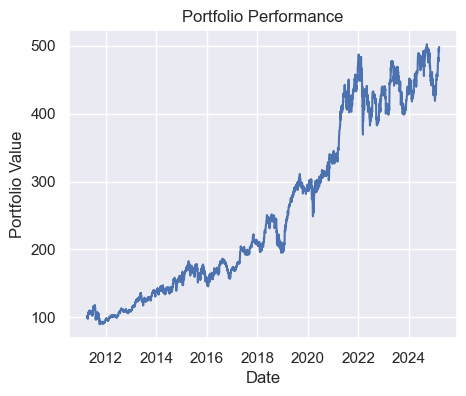

Stats for None from 2011-04-01 00:00:00 - 2025-03-14 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
392.55%             0.69  12.11%  -24.21%

Annualized Returns:
mtd    3m      6m     ytd     1y      3y     5y      10y     incep.
-----  ------  -----  ------  ------  -----  ------  ------  --------
4.66%  11.75%  0.06%  14.96%  10.89%  7.52%  14.93%  11.06%  12.11%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.69     0.77       0.85
mean    13.55%   12.27%     13.35%
vol     19.56%   16.00%     15.70%
skew    -0.19    -0.25      0.58
kurt    4.59     0.60       -0.28
best    8.53%    12.93%     43.34%
worst   -7.45%   -15.52%    -9.97%

Drawdowns:
max      avg       # days
-------  ------  --------
-24.21%  -3.42%     40.58

Misc:
---------------  ------
avg. up month    3.91%
avg. down month  -3.40%
up year %        78.57%
12m up % 

In [28]:
results, summary = rebalance_portfolio(data, rebalance_period=6, history_window=12)

In [62]:
def rebalance_portfolio(prices, benchmark_serie, 
                        portfolio_number_periods = 10, 
                        rebalance_period=6, history_window=12,
                        month_offset_from_today = 1,
                        display_stats=True,
                        display_graph=True):
    """ Perform dynamic portfolio optimization every 6 months based on 1 year history. """
    
    import scipy.optimize as sco
    import numpy as np
    import pandas as pd
    from dateutil.relativedelta import relativedelta
    
    """ 
    Defining the dates for the backtest
    """
    
    
    number_periods_unused = int(np.ceil(history_window / rebalance_period))

    # Adjust rebalancing dates relative to today's date
    today = pd.Timestamp.today().normalize()

    # Define the last month-end explicitly
    month_offset_from_today = month_offset_from_today if month_offset_from_today > 1 else 1
    last_month_end = (today - pd.DateOffset(months=month_offset_from_today)).replace(day=1) + pd.offsets.MonthEnd(0)
    
    # Generate rebalancing dates backward from the last_month_end
    rebalancing_dates = pd.date_range(end=last_month_end, 
                                    periods=portfolio_number_periods + number_periods_unused, 
                                    freq=pd.DateOffset(months=rebalance_period))
    
    # Ensure enough historical data
    rebalancing_dates = rebalancing_dates[rebalancing_dates > prices.index[0] + pd.DateOffset(months=history_window)]





    returns = prices.to_returns().dropna()
    log_returns = prices.to_log_returns().dropna()

    # Optimization parameters
    bounds = tuple((0, 1) for _ in range(len(prices.columns)))
    eq_constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    initial_guess = len(prices.columns) * [1. / len(prices.columns)]

    def portfolio_log_returns(weights, log_returns):
        return np.sum(log_returns.mean() * weights) * 252

    def portfolio_log_volatility(weights, log_returns):
        return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    def min_func_sharpe(weights, log_returns):
        return -portfolio_log_returns(weights, log_returns) / portfolio_log_volatility(weights, log_returns)

    optimized_weights = []
    portfolio_values = [1]
    portfolio_daily_returns = []
    portfolio_daily_volatility = []
    portfolio_daily_sharpe = []
    portfolio_kelly = []
    portfolio_var = []
    portfolio_cvar = []
    portfolio_target_vol = []
    portfolio_max_drawdown = []
    

    print("Starting Dynamic Portfolio Optimization:")
    print("----------------------------------------")
    
    portfolio_returns = []
    for period in range(number_periods_unused, len(rebalancing_dates) - 1):

        start_date = rebalancing_dates[period] - relativedelta(months=history_window)
        end_date = rebalancing_dates[period]

        historical_log_returns = log_returns.loc[start_date:end_date]
        historical_prices = returns.loc[start_date:end_date]

        opt_sharpe = sco.minimize(
            min_func_sharpe,
            x0=initial_guess,
            args=(historical_log_returns,),
            method='SLSQP',
            bounds=bounds,
            constraints=eq_constraints
        )

        weights = np.array([value if value > 1e-7 else 0 for value in opt_sharpe.x])
        weights /= np.sum(weights)

        optimized_weights.append(weights)

        # Get returns for the next 6 months with these weights
        next_period_start = end_date + pd.DateOffset(days=1)
        next_period_end = end_date + pd.DateOffset(months=rebalance_period)
        future_returns = returns.loc[next_period_start:next_period_end]

        # Compute daily portfolio returns and append
        period_portfolio_returns = future_returns.dot(weights)
        
        portfolio_values.append(
            round( ((1 + period_portfolio_returns).cumprod().iloc[-1] - 1) * 100, 2)
        )        
        portfolio_returns.append(period_portfolio_returns)
        
        
        ###################
        # Portfolio Stats # 
        ###################
        
        """ 
        We calculate from the values from the past,
        so we can compare with the furtue values to see 
        if this metrics can predict       
        """
        
        portfolio_serie = (1 + historical_prices.dot(weights)).cumprod() * 100
        
        port_stats = portfolio_serie.calc_stats()
        port_daily_return = port_stats.stats.get('daily_mean')
        port_daily_vol = port_stats.stats.get('daily_vol')
        port_daily_sharpe = port_stats.stats.get('daily_sharpe')
        port_max_drawdown = port_stats.stats.get('max_drawdown')
        
        # The volatility and the returns are annualized
        # that is, multiplied by an annualization factor
        
        kelly = port_daily_return / (port_daily_vol ** 2)
        target_vol = 0.15
        dynamic_leverage_vol = target_vol / port_daily_vol
        dynamic_leverage_vol = np.clip(dynamic_leverage_vol, 0.5, 3)        
        
        
        VaR = period_portfolio_returns.quantile(0.05)
        CVaR = period_portfolio_returns[period_portfolio_returns < VaR].mean()
        
        portfolio_daily_returns.append(
            round(port_daily_return * 100,2 ))
        portfolio_daily_volatility.append(round(port_daily_vol * 100, 2))
        portfolio_daily_sharpe.append(round(port_daily_sharpe, 2))
        portfolio_kelly.append(kelly)
        portfolio_var.append(VaR)
        portfolio_cvar.append(CVaR)
        portfolio_target_vol.append( dynamic_leverage_vol )
        portfolio_max_drawdown.append(port_max_drawdown)
                 
    

    portfolio_return_series = pd.concat(portfolio_returns)
    portfolio_serie = 100 * (1 + portfolio_return_series).cumprod()
    combined_serie = pd.concat([portfolio_serie, benchmark_serie], axis=1)
    combined_serie.columns = ['Portfolio', 'Benchmark']
    combined_serie = combined_serie.dropna()
    
    
    # Show information
    portfolio_stats = combined_serie['Portfolio'].calc_stats().stats
    benchmark_stats = combined_serie['Benchmark'].calc_stats().stats
    
    init_date = portfolio_stats.get('start').date().strftime("%Y-%m-%d")
    end_date = portfolio_stats.get('end').date().strftime("%Y-%m-%d")
    port_total_return = portfolio_stats.get('total_return')
    bench_total_return = benchmark_stats.get('total_return')
    port_yearly_return = portfolio_stats.get('yearly_mean')
    bench_yearly_return = benchmark_stats.get('yearly_mean')
    port_yearly_sharpe = portfolio_stats.get('yearly_sharpe')
    bench_yearly_sharpe = benchmark_stats.get('yearly_sharpe')
    port_cagr = portfolio_stats.get('cagr')
    bench_cagr = benchmark_stats.get('cagr')
    port_max_drawdown = portfolio_stats.get('max_drawdown')
    bench_max_drawdown = benchmark_stats.get('max_drawdown')
    port_yearly_vol = portfolio_stats.get('yearly_vol')
    bench_yearly_vol = benchmark_stats.get('yearly_vol')
    
    if display_stats:
        print("Portfolio Stats:")
        print(f"Init date: {init_date} | End date: {end_date}" )
        print()
        print(f"\t\t  | \t Portfolio \t | \t Benchmark")
        print("-" * 70)
        print(f"Total Return:\t  | \t {port_total_return*100:2.2f}% \t | \t {bench_total_return*100:2.2f}%")
        print(f"Yearly Return:\t  | \t {port_yearly_return*100:2.2f}%  \t | \t {bench_yearly_return*100:2.2f}%")
        print(f"Yearly Volatility | \t {port_yearly_vol*100:2.2f}%  \t | \t {bench_yearly_vol*100:2.2f}%")
        print(f"Yearly Sharpe:\t  | \t {port_yearly_sharpe:2.2f}   \t | \t {bench_yearly_sharpe:2.2f}")
        print(f"CAGR:\t\t  | \t {port_cagr*100:2.2f}%  \t | \t {bench_cagr*100:2.2f}%")
        print(f"Max Drawdown:\t  | \t {port_max_drawdown*100:2.2f}% \t | \t {bench_max_drawdown*100:2.2f}%")
        
    if display_graph:
        plt.figure(figsize=(5, 4))
        plt.title("Portfolio Performance")
        sns.lineplot(data=combined_serie.rebase())
        plt.ylabel("Portfolio Value")
        plt.show()
    
    
    optimized_weights = np.array(optimized_weights)
    results = pd.DataFrame({
        "Date": rebalancing_dates[number_periods_unused:-1],
        "Portfolio Value Per.": portfolio_values[1:],
        "Portfolio Daily Returns Per.": portfolio_daily_returns,
        "Portfolio Daily Volatility Per.": portfolio_daily_volatility,
        "Portfolio Daily Sharpe": portfolio_daily_sharpe,
        "Portfolio Kelly": portfolio_kelly,
        "Portfolio VaR": portfolio_var,
        "Portfolio CVaR": portfolio_cvar,
        "Target Volatility": portfolio_target_vol,
        "Max Drawdown": portfolio_max_drawdown,
        #**{f"Weights_{col}": optimized_weights[:, i] for i, col in enumerate(prices.columns)}
    })
    
    return results, portfolio_serie

list_results = []

for month_lag in range(1, 7):
    print(f"Month lag: {month_lag}")
    results, portfolio_serie = rebalance_portfolio(data, benchmark, portfolio_number_periods=100,
                                                rebalance_period=6, history_window=12,
                                                month_offset_from_today=month_lag,
                                                display_stats=True,
                                                display_graph=False)
    results['Month_lag'] = month_lag
    list_results.append(results)
    
df_results = pd.concat(list_results)

Month lag: 1
Starting Dynamic Portfolio Optimization:
----------------------------------------
Portfolio Stats:
Init date: 2012-08-29 | End date: 2025-02-28

		  | 	 Portfolio 	 | 	 Benchmark
----------------------------------------------------------------------
Total Return:	  | 	 161.55% 	 | 	 124.45%
Yearly Return:	  | 	 9.09%  	 | 	 6.49%
Yearly Volatility | 	 18.32%  	 | 	 12.51%
Yearly Sharpe:	  | 	 0.50   	 | 	 0.52
CAGR:		  | 	 7.99%  	 | 	 6.68%
Max Drawdown:	  | 	 -34.17% 	 | 	 -38.27%
Month lag: 2
Starting Dynamic Portfolio Optimization:
----------------------------------------
Portfolio Stats:
Init date: 2012-08-02 | End date: 2025-01-31

		  | 	 Portfolio 	 | 	 Benchmark
----------------------------------------------------------------------
Total Return:	  | 	 177.74% 	 | 	 133.59%
Yearly Return:	  | 	 9.84%  	 | 	 6.21%
Yearly Volatility | 	 19.21%  	 | 	 12.41%
Yearly Sharpe:	  | 	 0.51   	 | 	 0.50
CAGR:		  | 	 8.52%  	 | 	 7.02%
Max Drawdown:	  | 	 -27.52% 	 | 	 -38.27

In [63]:
df_results

,Date,Portfolio Value Per.,Portfolio Daily Returns Per.,Portfolio Daily Volatility Per.,Portfolio Daily Sharpe,Portfolio Kelly,Portfolio VaR,Portfolio CVaR,Target Volatility,Max Drawdown,Month_lag
0,2012-08-28,12.83,23.66,12.32,1.92,15.580643,-0.008489,-0.012847,1.217169,-0.057196,1
1,2013-02-28,3.83,28.55,10.54,2.71,25.701688,-0.019571,-0.023974,1.423220,-0.054728,1
2,2013-08-28,15.77,28.56,15.85,1.80,11.367510,-0.009180,-0.014167,0.946293,-0.137561,1
3,2014-02-28,5.50,41.19,18.74,2.20,11.733770,-0.014332,-0.018391,0.800632,-0.106286,1
4,2014-08-28,13.16,34.84,13.43,2.59,19.314244,-0.019706,-0.031224,1.116858,-0.069374,1
...,...,...,...,...,...,...,...,...,...,...,...
20,2022-03-30,-9.61,27.32,17.24,1.58,9.185699,-0.015698,-0.026522,0.869819,-0.178614,6
21,2022-09-30,15.31,4.13,17.26,0.24,1.387131,-0.017346,-0.025486,0.869270,-0.157595,6
22,2023-03-30,-4.13,21.40,20.52,1.04,5.083888,-0.018361,-0.027053,0.731135,-0.135267,6
23,2023-09-30,10.08,37.52,14.77,2.54,17.203134,-0.011652,-0.015911,1.015684,-0.068070,6


<Axes: xlabel='Portfolio Daily Volatility Per.', ylabel='Portfolio Daily Returns Per.'>

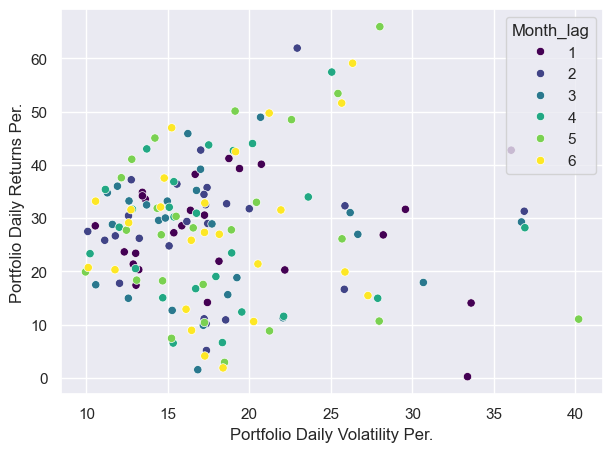

In [64]:
sns.scatterplot(data=df_results, x='Portfolio Daily Volatility Per.', y='Portfolio Daily Returns Per.', hue='Month_lag', palette='viridis')

<Axes: xlabel='Portfolio CVaR', ylabel='Portfolio Value Per.'>

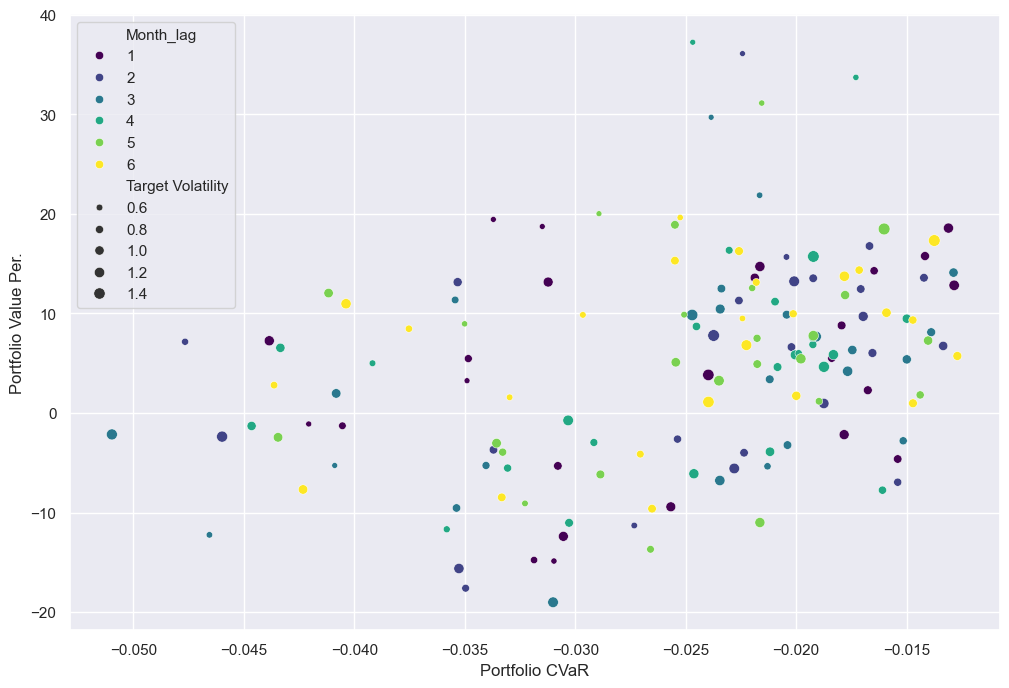

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_results,
                x = 'Portfolio CVaR', y="Portfolio Value Per.",
                size = 'Target Volatility', hue='Month_lag', palette='viridis')

<Axes: xlabel='Portfolio Kelly', ylabel='Portfolio Value Per.'>

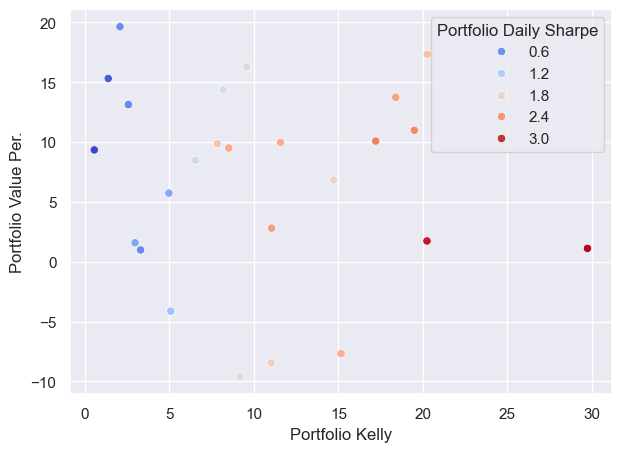

In [66]:
sns.scatterplot(data=results[results['Portfolio Kelly'] < 2000], 
                x='Portfolio Kelly', y="Portfolio Value Per.",
                hue="Portfolio Daily Sharpe", palette='coolwarm')

<Axes: xlabel='Portfolio CVaR', ylabel='Portfolio Value Per.'>

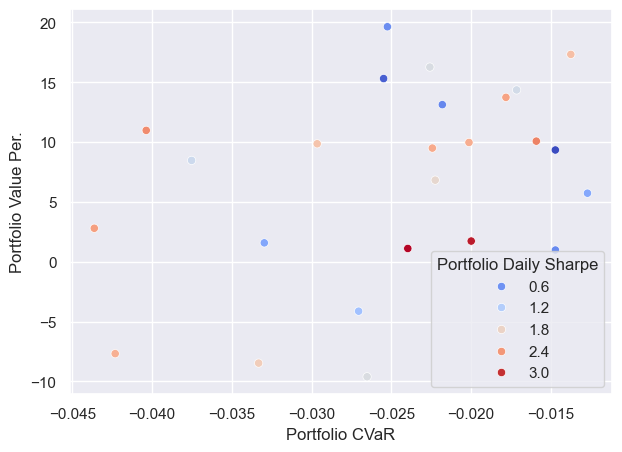

In [67]:
sns.scatterplot(data=results, 
                x='Portfolio CVaR', y="Portfolio Value Per.",
                hue="Portfolio Daily Sharpe", palette='coolwarm')

<Axes: xlabel='Portfolio CVaR', ylabel='Portfolio Value Per.'>

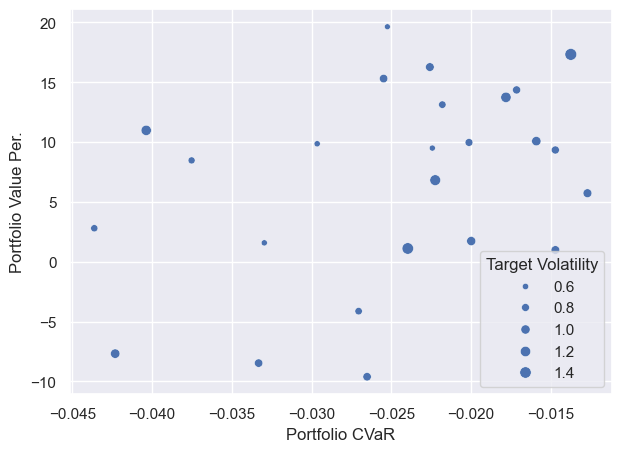

In [68]:
sns.scatterplot(data=results, 
                x='Portfolio CVaR', y="Portfolio Value Per.",
                size="Target Volatility")

In [69]:
df_results['leverage'] = ( df_results['Portfolio Value Per.'] > 0.5 ).astype(int)
df_results.tail()

,Date,Portfolio Value Per.,Portfolio Daily Returns Per.,Portfolio Daily Volatility Per.,Portfolio Daily Sharpe,Portfolio Kelly,Portfolio VaR,Portfolio CVaR,Target Volatility,Max Drawdown,Month_lag,leverage
20,2022-03-30,-9.61,27.32,17.24,1.58,9.185699,-0.015698,-0.026522,0.869819,-0.178614,6,0
21,2022-09-30,15.31,4.13,17.26,0.24,1.387131,-0.017346,-0.025486,0.869270,-0.157595,6,1
22,2023-03-30,-4.13,21.40,20.52,1.04,5.083888,-0.018361,-0.027053,0.731135,-0.135267,6,0
23,2023-09-30,10.08,37.52,14.77,2.54,17.203134,-0.011652,-0.015911,1.015684,-0.068070,6,1
24,2024-03-30,6.82,20.31,11.75,1.73,14.716244,-0.013888,-0.022250,1.276880,-0.082548,6,1


In [72]:
df_results['leverage'].value_counts()

leverage
1    102
0     48
Name: count, dtype: int64

Best parameters: OrderedDict({'alpha': 0, 'colsample_bytree': 1.0, 'gamma': 0.5947135112550075, 'lambda': 9, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 423, 'scale_pos_weight': 9, 'subsample': 0.878200530011615})
Best score: 0.8095238095238095
Accuracy: 0.8666666666666667
F1 Score: 0.9117647058823529
Confusion Matrix:
[[ 8  3]
 [ 3 31]]


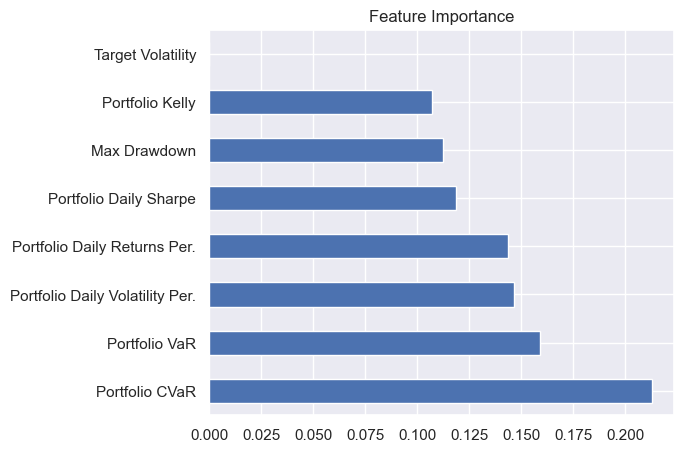

In [70]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from skopt import BayesSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    df_results.drop(columns=['Portfolio Value Per.', 'Date', 'Month_lag', 'leverage']),
    df_results['leverage'],
    test_size=0.3,
    random_state=42
)

param_grid = {
    'n_estimators': (400, 700),
    'learning_rate': (0.01, 0.1),
    'max_depth': (3, 6),
    'min_child_weight': (1, 5),
    'gamma': (0.1, 0.8),
    'subsample': (0.7, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'lambda': (5, 10),
    'alpha': (0, 5),
    'scale_pos_weight' : (1, 15),
}
bayes_search = BayesSearchCV(
    xgb.XGBClassifier(),
    param_grid,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=0
)
bayes_search.fit(X_train, y_train)
best_clf = bayes_search.best_estimator_
print("Best parameters:", bayes_search.best_params_)
print("Best score:", bayes_search.best_score_)

y_pred = best_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# feature importance
plt.figure(figsize=(6, 5))
feature_importance = pd.Series(best_clf.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

Month lag: 1
Starting Dynamic Portfolio Optimization:
----------------------------------------
Portfolio Stats:
Init date: 2020-08-31 | End date: 2025-02-28

	          | Portfolio 	 | Benchmark 	 | Leverage Portfolio
------------------------------------------------------------------------------------------
Total Return:	  | 26.88%	 | 66.95%	 | 26.88%
Yearly Return:	  | 8.10%	 | 9.55%	 | 8.10%
Yearly Volatility | 18.46%	 | 13.09%	 | 18.46%
Yearly Sharpe:	  | 0.44	 | 0.73		 | 0.44
CAGR:		  | 5.44%	 | 12.08%	 | 5.44%
Max Drawdown:	  | -29.64%	 | -25.50%	 | -29.64%
Month lag: 2
Starting Dynamic Portfolio Optimization:
----------------------------------------
Portfolio Stats:
Init date: 2020-08-03 | End date: 2025-01-31

	          | Portfolio 	 | Benchmark 	 | Leverage Portfolio
------------------------------------------------------------------------------------------
Total Return:	  | 28.87%	 | 62.76%	 | 28.87%
Yearly Return:	  | 9.47%	 | 8.82%	 | 9.47%
Yearly Volatility | 24.35%	 | 13.0

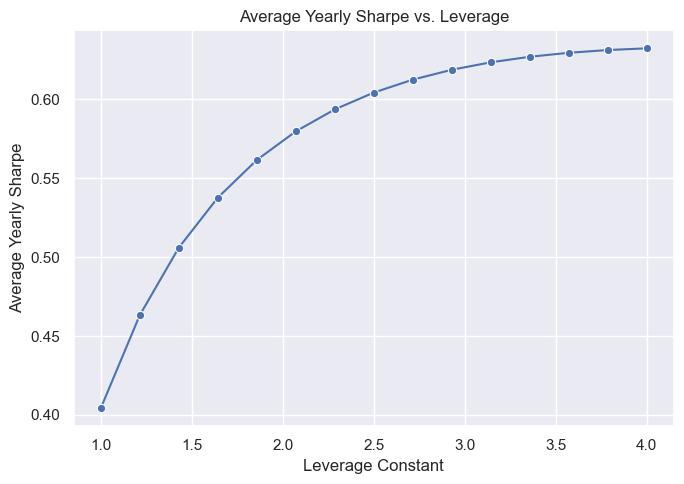

In [103]:
def rebalance_portfolio_with_leverage(prices, benchmark_serie, 
                        portfolio_number_periods = 10, 
                        rebalance_period=6, history_window=12,
                        month_offset_from_today = 1,
                        leverage_model=None, leverage_const = 1.5,
                        display_stats=True,
                        display_graph=True):
    """ Perform dynamic portfolio optimization every 6 months based on 1 year history. """
    
    import scipy.optimize as sco
    import numpy as np
    import pandas as pd
    from dateutil.relativedelta import relativedelta
    
    """ 
    Defining the dates for the backtest
    """
    
    if leverage_model is None:
        raise ValueError("Please provide a model to predict the leverage")
    
    
    number_periods_unused = int(np.ceil(history_window / rebalance_period))

    # Adjust rebalancing dates relative to today's date
    today = pd.Timestamp.today().normalize()

    # Define the last month-end explicitly
    month_offset_from_today = month_offset_from_today if month_offset_from_today > 1 else 1
    last_month_end = (today - pd.DateOffset(months=month_offset_from_today)).replace(day=1) + pd.offsets.MonthEnd(0)
    
    # Generate rebalancing dates backward from the last_month_end
    rebalancing_dates = pd.date_range(end=last_month_end, 
                                    periods=portfolio_number_periods + number_periods_unused, 
                                    freq=pd.DateOffset(months=rebalance_period))
    
    # Ensure enough historical data
    rebalancing_dates = rebalancing_dates[rebalancing_dates > prices.index[0] + pd.DateOffset(months=history_window)]



    returns = prices.to_returns().dropna()
    log_returns = prices.to_log_returns().dropna()

    # Optimization parameters
    bounds = tuple((0, 1) for _ in range(len(prices.columns)))
    eq_constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    initial_guess = len(prices.columns) * [1. / len(prices.columns)]

    def portfolio_log_returns(weights, log_returns):
        return np.sum(log_returns.mean() * weights) * 252

    def portfolio_log_volatility(weights, log_returns):
        return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    def min_func_sharpe(weights, log_returns):
        return -portfolio_log_returns(weights, log_returns) / portfolio_log_volatility(weights, log_returns)

    portfolio_daily_returns = []
    portfolio_daily_volatility = []
    portfolio_daily_sharpe = []
    portfolio_kelly = []
    portfolio_var = []
    portfolio_cvar = []
    portfolio_target_vol = []
    portfolio_max_drawdown = []
    

    print("Starting Dynamic Portfolio Optimization:")
    print("----------------------------------------")
    
    optimized_weights = []
    portfolio_values = [1]
    portfolio_returns = []
    
    portfolio_leverage_values = [1]
    portfolio_leverage_returns = []
    for period in range(number_periods_unused, len(rebalancing_dates) - 1):

        start_date = rebalancing_dates[period] - relativedelta(months=history_window)
        end_date = rebalancing_dates[period]

        historical_log_returns = log_returns.loc[start_date:end_date]
        historical_prices = returns.loc[start_date:end_date]

        opt_sharpe = sco.minimize(
            min_func_sharpe,
            x0=initial_guess,
            args=(historical_log_returns,),
            method='SLSQP',
            bounds=bounds,
            constraints=eq_constraints
        )

        weights = np.array([value if value > 1e-7 else 0 for value in opt_sharpe.x])
        weights /= np.sum(weights)

        optimized_weights.append(weights)

        # Get returns for the next 6 months with these weights
        next_period_start = end_date + pd.DateOffset(days=1)
        next_period_end = end_date + pd.DateOffset(months=rebalance_period)
        future_returns = returns.loc[next_period_start:next_period_end]

        # Compute daily portfolio returns and append
        period_portfolio_returns = future_returns.dot(weights)
        
        portfolio_values.append(
            round( ((1 + period_portfolio_returns).cumprod().iloc[-1] - 1) * 100, 2)
        )        
        portfolio_returns.append(period_portfolio_returns)
        
        ###################
        # Portfolio Stats # 
        ###################
        
        """ 
        We calculate from the values from the past,
        so we can compare with the furtue values to see 
        if this metrics can predict       
        """
        
        portfolio_serie = (1 + historical_prices.dot(weights)).cumprod() * 100
        
        port_stats = portfolio_serie.calc_stats()
        port_daily_return = port_stats.stats.get('daily_mean')
        port_daily_vol = port_stats.stats.get('daily_vol')
        port_daily_sharpe = port_stats.stats.get('daily_sharpe')
        port_max_drawdown = port_stats.stats.get('max_drawdown')
        
        # The volatility and the returns are annualized
        # that is, multiplied by an annualization factor
        
        kelly = port_daily_return / (port_daily_vol ** 2)
        target_vol = 0.15
        dynamic_leverage_vol = target_vol / port_daily_vol
        dynamic_leverage_vol = np.clip(dynamic_leverage_vol, 0.5, 3)        
        
        
        VaR = period_portfolio_returns.quantile(0.05)
        CVaR = period_portfolio_returns[period_portfolio_returns < VaR].mean()
        
        portfolio_daily_returns.append(
            round(port_daily_return * 100,2 ))
        portfolio_daily_volatility.append(round(port_daily_vol * 100, 2))
        portfolio_daily_sharpe.append(round(port_daily_sharpe, 2))
        portfolio_kelly.append(kelly)
        portfolio_var.append(VaR)
        portfolio_cvar.append(CVaR)
        portfolio_target_vol.append( dynamic_leverage_vol )
        portfolio_max_drawdown.append(port_max_drawdown)
        
        
        ###################
        # Leverage Model #
        ###################
        
        results = pd.DataFrame({
            "Portfolio Daily Returns Per.": [ portfolio_daily_returns[-1] ],
            "Portfolio Daily Volatility Per.": [ portfolio_daily_volatility[-1] ],
            "Portfolio Daily Sharpe": [ portfolio_daily_sharpe[-1] ],
            "Portfolio Kelly": [ portfolio_kelly[-1] ],
            "Portfolio VaR": [ portfolio_var[-1] ],
            "Portfolio CVaR": [ portfolio_cvar[-1] ],
            "Target Volatility": [ portfolio_target_vol[-1] ],
            "Max Drawdown": [ portfolio_max_drawdown[-1] ],
        })
        
        leverage_prediction = leverage_model.predict(results)    
        
        
        #######################
        # Adding the leverage #
        #######################
        
        if leverage_prediction[0] == 1:
            dynamic_leverage = leverage_const
        else:
            dynamic_leverage = 1
            
        period_portfolio_leverage_returns = period_portfolio_returns * dynamic_leverage
        
        portfolio_leverage_values.append(
            round( ((1 + period_portfolio_leverage_returns).cumprod().iloc[-1] - 1) * 100, 2)
        )        
        portfolio_leverage_returns.append(period_portfolio_leverage_returns)
        
        
        
        

    portfolio_return_series = pd.concat(portfolio_returns)
    portfolio_serie = 100 * (1 + portfolio_return_series).cumprod()
    combined_serie = pd.concat([portfolio_serie, benchmark_serie], axis=1)
    combined_serie.columns = ['Portfolio', 'Benchmark']
    combined_serie = combined_serie.dropna()
    
    
    # -----------------------------------------------
    # Added Leverage Portfolio for comparison
    # -----------------------------------------------
    if portfolio_leverage_returns:
        portfolio_leverage_return_series = pd.concat(portfolio_leverage_returns)
        portfolio_leverage_series = 100 * (1 + portfolio_leverage_return_series).cumprod()
        combined_serie = pd.concat([combined_serie, portfolio_leverage_series], axis=1)
        combined_serie.columns = ['Portfolio', 'Benchmark', 'Portfolio Leverage']
    
    
    # Show information
    portfolio_stats = combined_serie['Portfolio'].calc_stats().stats
    benchmark_stats = combined_serie['Benchmark'].calc_stats().stats
    if 'Portfolio Leverage' in combined_serie.columns:
        leverage_stats = combined_serie['Portfolio Leverage'].calc_stats().stats
    else:
        leverage_stats = None
    
    init_date = portfolio_stats.get('start').date().strftime("%Y-%m-%d")
    end_date = portfolio_stats.get('end').date().strftime("%Y-%m-%d")
    port_total_return = portfolio_stats.get('total_return')
    bench_total_return = benchmark_stats.get('total_return')
    port_yearly_return = portfolio_stats.get('yearly_mean')
    bench_yearly_return = benchmark_stats.get('yearly_mean')
    port_yearly_sharpe = portfolio_stats.get('yearly_sharpe')
    bench_yearly_sharpe = benchmark_stats.get('yearly_sharpe')
    port_cagr = portfolio_stats.get('cagr')
    bench_cagr = benchmark_stats.get('cagr')
    port_max_drawdown = portfolio_stats.get('max_drawdown')
    bench_max_drawdown = benchmark_stats.get('max_drawdown')
    port_yearly_vol = portfolio_stats.get('yearly_vol')
    bench_yearly_vol = benchmark_stats.get('yearly_vol')
    
    if display_stats:
        if leverage_stats is not None:
            lev_total_return = leverage_stats.get('total_return')
            lev_yearly_return = leverage_stats.get('yearly_mean')
            lev_yearly_sharpe = leverage_stats.get('yearly_sharpe')
            lev_cagr = leverage_stats.get('cagr')
            lev_max_drawdown = leverage_stats.get('max_drawdown')
            lev_yearly_vol = leverage_stats.get('yearly_vol')
            
            print("Portfolio Stats:")
            print(f"Init date: {init_date} | End date: {end_date}" )
            print()
            print(f"\t          | Portfolio \t | Benchmark \t | Leverage Portfolio")
            print("-" * 90)
            print(f"Total Return:\t  | {port_total_return*100:2.2f}%\t | {bench_total_return*100:2.2f}%\t | {lev_total_return*100:2.2f}%")
            print(f"Yearly Return:\t  | {port_yearly_return*100:2.2f}%\t | {bench_yearly_return*100:2.2f}%\t | {lev_yearly_return*100:2.2f}%")
            print(f"Yearly Volatility | {port_yearly_vol*100:2.2f}%\t | {bench_yearly_vol*100:2.2f}%\t | {lev_yearly_vol*100:2.2f}%")
            print(f"Yearly Sharpe:\t  | {port_yearly_sharpe:2.2f}\t | {bench_yearly_sharpe:2.2f}\t\t | {lev_yearly_sharpe:2.2f}")
            print(f"CAGR:\t\t  | {port_cagr*100:2.2f}%\t | {bench_cagr*100:2.2f}%\t | {lev_cagr*100:2.2f}%")
            print(f"Max Drawdown:\t  | {port_max_drawdown*100:2.2f}%\t | {bench_max_drawdown*100:2.2f}%\t | {lev_max_drawdown*100:2.2f}%")
        else:
            print("Portfolio Stats:")
            print(f"Init date: {init_date} | End date: {end_date}" )
            print()
            print(f"\t   | Portfolio \t | Benchmark")
            print("-" * 70)
            print(f"Total Return:\t   | {port_total_return*100:2.2f}% \t | {bench_total_return*100:2.2f}%")
            print(f"Yearly Return:\t   | {port_yearly_return*100:2.2f}% \t | {bench_yearly_return*100:2.2f}%")
            print(f"Yearly Volatility | {port_yearly_vol*100:2.2f}% \t | {bench_yearly_vol*100:2.2f}%")
            print(f"Yearly Sharpe:\t   | {port_yearly_sharpe:2.2f} \t\t | {bench_yearly_sharpe:2.2f}")
            print(f"CAGR:\t\t   | {port_cagr*100:2.2f}% \t | {bench_cagr*100:2.2f}%")
            print(f"Max Drawdown:\t   | {port_max_drawdown*100:2.2f}% \t | {bench_max_drawdown*100:2.2f}%")
    
    if display_graph:
        import matplotlib.pyplot as plt
        import seaborn as sns
        plt.figure(figsize=(6, 4))
        plt.title("Portfolio Performance")
        sns.lineplot(data=combined_serie.rebase())
        plt.ylabel("Portfolio Value")
        plt.tight_layout()
        plt.tick_params(axis='x', rotation=45)
        plt.show()
    
    
    optimized_weights = np.array(optimized_weights)
    results = pd.DataFrame({
        "Date": rebalancing_dates[number_periods_unused:-1],
        "Portfolio Value Per.": portfolio_values[1:],
        "Portfolio Daily Returns Per.": portfolio_daily_returns,
        "Portfolio Daily Volatility Per.": portfolio_daily_volatility,
        "Portfolio Daily Sharpe": portfolio_daily_sharpe,
        "Portfolio Kelly": portfolio_kelly,
        "Portfolio VaR": portfolio_var,
        "Portfolio CVaR": portfolio_cvar,
        "Target Volatility": portfolio_target_vol,
        "Max Drawdown": portfolio_max_drawdown,
        #**{f"Weights_{col}": optimized_weights[:, i] for i, col in enumerate(prices.columns)}
    })
    
    end_results = {
        "Total Return": lev_total_return,
        "Yearly Return": lev_yearly_return,
        "Yearly Volatility": lev_yearly_vol,
        "Yearly Sharpe": lev_yearly_sharpe,
        "CAGR": lev_cagr,
        "Max Drawdown": lev_max_drawdown
    }
    
    return results, end_results, portfolio_serie

#list_results = []

leverages_results = []
for leverage in np.linspace(1, 4, 15):
    temp_list_sharpe = []
    for month_lag in range(1, 7):
        print(f"Month lag: {month_lag}")
        results, end_results, portfolio_serie = rebalance_portfolio_with_leverage(
                                        data, benchmark, portfolio_number_periods=10,
                                        rebalance_period=6, history_window=12,
                                        month_offset_from_today=month_lag,
                                        leverage_model=best_clf,
                                        leverage_const=leverage,
                                        display_stats=True,
                                        display_graph=False
                                    )
        temp_list_sharpe.append(end_results['Yearly Sharpe'])
        #results['Month_lag'] = month_lag
    leverages_results.append({
        'avg_sharpe' : np.mean(temp_list_sharpe),
        'leverage' : leverage
    })
    #list_results.append(results)
    
#df_results = pd.concat(list_results)
df_leverage_results = pd.DataFrame(leverages_results)

sns.lineplot(data=df_leverage_results, x="leverage", y="avg_sharpe", marker="o")
plt.title("Average Yearly Sharpe vs. Leverage")
plt.xlabel("Leverage Constant")
plt.ylabel("Average Yearly Sharpe")
plt.tight_layout()
plt.show()